# 케라스의 순환층 ( Recurrent Neural Network )
keras의 SimpleRNN은 다른 케라스 층과 마찬가지로 시퀀스 배치 처리를 하게 되어있습니다. 즉 (timesteps, input_features) 크기가 아니라 (batch_size, timesteps, input_features) 크기의 입력을 받습니다. 

다른 케라스의 순환층과 마찬가지로 SimpleRNN은 두 가지 모드로 실행할 수 있습니다. 각 타임스텝의 출력을 모은 전체 시퀀스를 반환하거나(batch_size, timesteps, output_features의 3D 텐서), 입력 시퀀스에 대한 마지막 출력만 반환할 수 있습니다(batch_size, output_features의 2D 텐서). 어떤 출력을 반환시킬지는 return_sequences에서 지정할 수 있습니다.

In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [2]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


위 두 코드의 출력 셀을 보면, RNN의 output shape이 서로 다르다는 것을 확인할 수 있습니다.

네트워크의 표현력을 증가시키기 위해 여러 개의 순환 층을 차례대로 쌓는 것이 유용할 때가 있습니다. 이런 설정에서는 중간 층들이 전체 출력 시퀀스를 반환하도록 설정해야 합니다.

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


이제 IMDB 영화 리뷰 분류 문제에 적용해보겠습니다. 먼저 데이터를 전처리합니다.

In [11]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기 :', input_train.shape)
print('input_test 크기 :', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기 : (25000, 500)
input_test 크기 : (25000, 500)


In [12]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 13s 80ms/step - loss: 0.6276 - acc: 0.6320 - val_loss: 0.5204 - val_acc: 0.7590
Epoch 2/10
157/157 [==============================] - 12s 78ms/step - loss: 0.4005 - acc: 0.8315 - val_loss: 0.3838 - val_acc: 0.8342
Epoch 3/10
157/157 [==============================] - 12s 78ms/step - loss: 0.2863 - acc: 0.8874 - val_loss: 0.3775 - val_acc: 0.8318
Epoch 4/10
157/157 [==============================] - 12s 75ms/step - loss: 0.2369 - acc: 0.9081 - val_loss: 0.3606 - val_acc: 0.8502
Epoch 5/10
157/157 [==============================] - 12s 76ms/step - loss: 0.1828 - acc: 0.9321 - val_loss: 0.4360 - val_acc: 0.8218
Epoch 6/10
157/157 [==============================] - 13s 80ms/step - loss: 0.1708 - acc: 0.9336 - val_loss: 0.4397 - val_acc: 0.8332
Epoch 7/10
157/157 [==============================] - 13s 83ms/step - loss: 0.1048 - acc: 0.9636 - val_loss: 0.4740 - val_acc: 0.8186
Epoch 8/10
157/157 [==============================] - 13s 83ms

In [8]:
import matplotlib.pyplot as plt

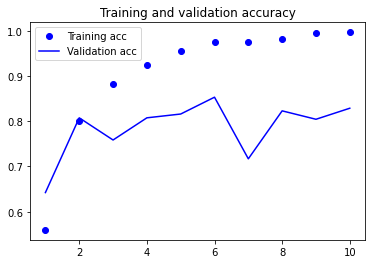

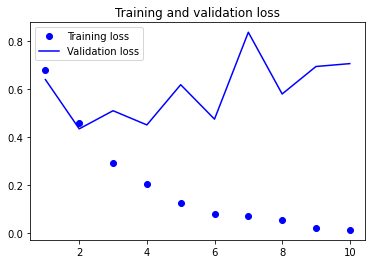

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


3번째 epochs부터 과대적합이 시작하며, 모델의 테스트 정확도가 그렇게 높지 않습니다. 이는 SimpleRNN이 텍스트와 같이 긴 시퀀스를 처리하는 데 적합하지 않기 때문입니다. 더 잘 작동하는 다른 순환층을 살펴보겠습니다.

# LSTM 
keras의 LSTM은 출력 차원만 지정해주면 됩니다. 다른 파라미터들은 디폴트 값으로도 충분히 좋은 모델을 만들어주므로 아직은 괜찮습니다.

In [13]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 33s 197ms/step - loss: 0.4851 - acc: 0.7702 - val_loss: 0.3805 - val_acc: 0.8446
Epoch 2/10
157/157 [==============================] - 31s 195ms/step - loss: 0.2920 - acc: 0.8834 - val_loss: 0.3572 - val_acc: 0.8634
Epoch 3/10
157/157 [==============================] - 31s 200ms/step - loss: 0.2348 - acc: 0.9119 - val_loss: 0.3620 - val_acc: 0.8398
Epoch 4/10
157/157 [==============================] - 31s 200ms/step - loss: 0.2038 - acc: 0.9243 - val_loss: 0.2874 - val_acc: 0.8816
Epoch 5/10
157/157 [==============================] - 31s 199ms/step - loss: 0.1717 - acc: 0.9388 - val_loss: 0.3228 - val_acc: 0.86240.1688 - acc: 0. - ETA: 6s - loss: 0.1720 - acc: 0.93 - ET
Epoch 6/10
157/157 [==============================] - 31s 199ms/step - loss: 0.1604 - acc: 0.9419 - val_loss: 0.3280 - val_acc: 0.8704
Epoch 7/10
157/157 [==============================] - 31s 199ms/step - loss: 0.1435 - acc: 0.9513 - val_loss: 0.3209 - val_acc: 0.88

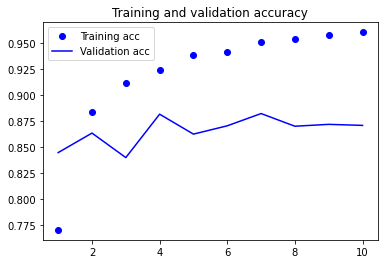

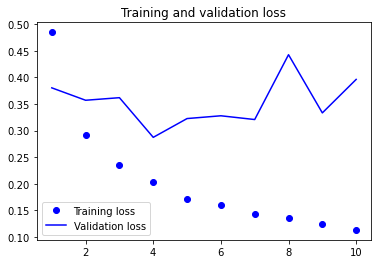

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()